### 02_tensorflow_introduction


In [68]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [25]:
@tf.function
def h():    
    return tf.matmul(x,W) + b

x = tf.random.uniform(shape=(1,10))
W = tf.Variable(tf.random.normal(shape=(10,5)))
b = tf.Variable(tf.zeros(shape=(5,)))
print("x",x)
print("W",W)
print("b",b)

x tf.Tensor(
[[0.4925884  0.37395215 0.1747979  0.9107853  0.01614165 0.07417619
  0.8636869  0.955922   0.78230476 0.07523596]], shape=(1, 10), dtype=float32)
W <tf.Variable 'Variable:0' shape=(10, 5) dtype=float32, numpy=
array([[ 0.55705744, -1.0692693 , -0.4465745 , -0.6625378 ,  0.43104854],
       [ 1.2151113 , -0.09196649, -2.1251287 , -0.4395359 , -0.37476   ],
       [-1.5910635 , -0.09118728, -1.0366429 , -0.07998077, -0.3442503 ],
       [ 0.13965271,  1.5583334 , -1.619713  , -2.2061355 ,  1.8054907 ],
       [-0.4416876 , -0.7126131 ,  0.12119571,  0.99085647,  0.1250758 ],
       [-1.5411544 , -0.8480322 ,  1.1053486 , -1.3126347 , -0.971203  ],
       [-0.0606406 ,  0.61751074, -0.3302214 ,  0.54573965, -1.0844215 ],
       [ 0.294339  , -0.18138239,  1.2751751 ,  0.6588241 , -0.48392597],
       [ 0.65265024, -0.19750533,  0.46315965, -1.515624  ,  0.41151518],
       [-2.0853841 , -1.1797303 , -0.7215572 , -0.61033857,  1.6890589 ]],
      dtype=float32)>
b <tf.Variabl

In [26]:
print(h())
print(tf.nn.sigmoid(h()))

tf.Tensor([[ 1.0390922   0.88454163 -1.3453362  -2.7258587   0.6362183 ]], shape=(1, 5), dtype=float32)
tf.Tensor([[0.73867476 0.7077625  0.20663387 0.06146461 0.6538981 ]], shape=(1, 5), dtype=float32)


In [35]:
x = tf.constant(value=[[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]],dtype=tf.float32,name='x') 
@tf.function
def h(x):    
    return tf.matmul(x,W) + b
print(h(x))

tf.Tensor([[-2.5732427  -1.4648024  -0.22048265 -2.418085    0.98007685]], shape=(1, 5), dtype=float32)


In [36]:
for i in range(3):
    x = tf.random.uniform(shape=(1,10))
    print(h(x))

tf.Tensor([[-0.84121966 -1.0764904  -1.1125308  -1.7979126   1.2991214 ]], shape=(1, 5), dtype=float32)
tf.Tensor([[-1.0267186 -1.307213  -2.9732525 -3.9092722  2.2230852]], shape=(1, 5), dtype=float32)
tf.Tensor([[-1.1482943 -0.919922  -1.4295361 -3.1577754  2.6012206]], shape=(1, 5), dtype=float32)


In [69]:
from tensorflow.keras import datasets
def normalize_data(x,y):
    x = tf.cast(x, tf.float32) /255.0
    y = tf.cast(y, tf.int64)
    return x,y

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
ds = ds.take(1000).shuffle(1000).batch(128)
ds = ds.map(normalize_data)

In [70]:
from tensorflow.keras import layers, models
inputs = keras.Input(shape=(28,28), name="inputs")
d = layers.Flatten(name="flatten")(inputs)
d = layers.Dense(units=100, activation="relu", name="dense_1")(d)
outputs = layers.Dense(units=10, activation="softmax", name="outputs")(d)
model = models.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
outputs (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [80]:
from tensorflow.keras import optimizers
optimizer = optimizers.Adam()

@tf.function
def compute_loss(logits, labels):
    return tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels))

@tf.function
def compute_accuracy(logits, labels):
    predictions = tf.argmax(logits, axis=1)
    return tf.reduce_mean(tf.cast(tf.equal(predictions, labels), tf.float32))

@tf.function
def train_one_step(model, optimizer, x, y):
    with tf.GradientTape() as tape:
        logits = model(x)
        loss = compute_loss(logits, y)   
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    accuracy = compute_accuracy(logits, y)
    
    return loss, accuracy

train_accuracy_over_time = []
train_loss_over_time = []

def train(epoch, model, optimizer):
    loss = 0.0
    accuracy = 0.0
    total_step = 0
    
    for step, (x,y) in enumerate(ds):
        total_step += 1
        loss, accuracy = train_one_step(model, optimizer, x, y)
        if (step+1) % 100 == 0:
            train_loss_over_time.append(loss.numpy())
            train_accuracy_over_time.append(accuracy.numpy())
            print('epoch', epoch,"step",(step+1), ': loss', loss.numpy(), '; accuracy', accuracy.numpy())
            
    print("total_step",total_step)
    return loss, accuracy

for epoch in range(1):
    loss, accuracy = train(epoch, model, optimizer)
print('Final epoch', epoch, ': loss', loss.numpy(), '; accuracy', accuracy.numpy())
    

loss Tensor("PartitionedCall:0", shape=(), dtype=float32)
loss Tensor("PartitionedCall:0", shape=(), dtype=float32)
loss Tensor("PartitionedCall:0", shape=(), dtype=float32)
Final epoch 0 : loss 1.8113177 ; accuracy 0.72115386


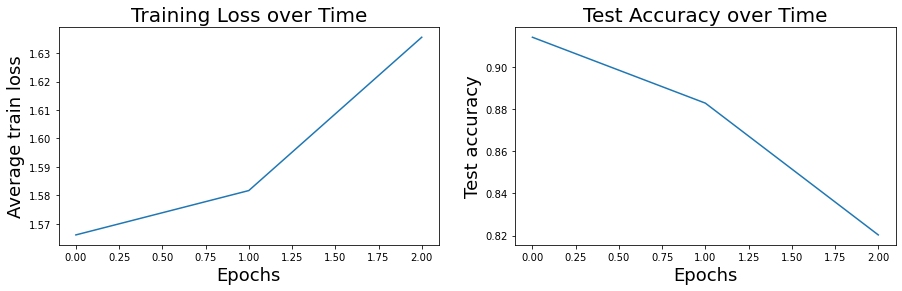

In [67]:
import matplotlib.pyplot as plt
x_axis = np.arange(len(train_loss_over_time))

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(w=15,h=4)
ax[0].plot(x_axis, train_loss_over_time)
ax[0].set_xlabel('Epochs',fontsize=18)
ax[0].set_ylabel('Average train loss',fontsize=18)
ax[0].set_title('Training Loss over Time',fontsize=20)
ax[1].plot(x_axis, train_accuracy_over_time)
ax[1].set_xlabel('Epochs',fontsize=18)
ax[1].set_ylabel('Test accuracy',fontsize=18)
ax[1].set_title('Test Accuracy over Time',fontsize=20)
plt.show()
#fig.savefig('mnist_stats.jpg')

labels [6 1 7 2 8 6 9 4 0 9]
preds  [6 1 7 2 9 6 9 4 0 9]


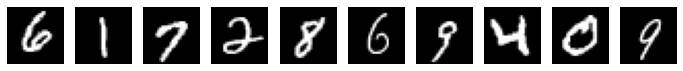

In [66]:

index = 13
labels = y_train[index:index+10]
test_data = x_train[index:index+10]
predictions = model.predict(test_data)
predictions = tf.math.argmax(predictions, axis=1)
print("labels",labels)
print("preds ",predictions.numpy())
plt.figure(figsize=(12,3))
for i in range(10):
    plt.subplot(1,10,(i+1))
    plt.imshow(test_data[i],cmap="gray")
    plt.axis("off")
plt.show()